In [1]:
!pip install --upgrade gensim -q
!pip install matplotlib -q
!pip install spacy

In [2]:
import gensim
from gensim.models import word2vec
from gensim.models.word2vec import Word2Vec
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import spacy
import string

2023-05-10 11:37:50.678431: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-10 11:37:50.980412: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-10 11:37:50.982356: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-10 11:37:52.170688: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-05-10 11:37:53.421221: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [6]:
import gensim.downloader as api
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [12]:
wv1 = api.load('glove-wiki-gigaword-50')

In [13]:
wv2 = api.load('glove-wiki-gigaword-100')

[==================================================] 100.0% 128.1/128.1MB downloaded


In [14]:
wv3 = api.load('glove-wiki-gigaword-200')

[==================================================] 100.0% 252.1/252.1MB downloaded


In [15]:
wv4 = api.load('glove-wiki-gigaword-300')

In [17]:
w3 = api.load('glove-twitter-25')

[==================================================] 100.0% 104.8/104.8MB downloaded


In [18]:
w4 = api.load('glove-twitter-50')

In [19]:
w5 = api.load('glove-twitter-100')

[==================================================] 100.0% 387.1/387.1MB downloaded


In [20]:
w6 = api.load('glove-twitter-200')

[==================================================] 100.0% 758.5/758.5MB downloaded


In [6]:
import json
import numpy as np
debaised_wv = json.load(open('data.json'))

In [2]:
t1 = open('t1.txt','r')
t2 = open('t2.txt','r')
m = open('m.txt','r')
f = open('f.txt','r')
target1 = []
target2 = []
male = []
female = []

In [3]:
for line in t1:
    target1.append(line.strip())
for line in t2:
    target2.append(line.strip())
for line in m:
    male.append(line.strip())
for line in f:
    female.append(line.strip())
# print all lists
print(target1)
print(target2)
print(male)
print(female)

['math', 'algebra', 'geometry', 'calculus', 'equations', 'computation', 'numbers', 'addition']
['poetry', 'art', 'dance', 'literature', 'novel', 'symphony', 'drama', 'sculpture']
['male', 'man', 'boy', 'brother', 'he', 'him', 'his', 'son']
['female', 'woman', 'girl', 'sister', 'she', 'her', 'hers', 'daughter']


In [7]:
## WEAT
def s(x,A,B,wv):
    nA = len(A)
    nB = len(B)
    sumA = 0
    alist = []
    blist = []
    for i in range(nA):
        a = np.dot(np.array(debaised_wv[x]),np.array(debaised_wv[A[i]]))
        sumA += a
        alist.append(a)
    sumB = 0
    for i in range(nB):
        b = np.dot(np.array(debaised_wv[x]),np.array(debaised_wv[B[i]]))
        sumB += b
        blist.append(b)
    meanA = sumA/nA
    meanB = sumB/nB
    std_dev = np.std(alist+blist)
    diff = meanA - meanB
    return diff/std_dev
        


def S(X,Y,A,B, wv):
    nX = len(X)
    nY = len(Y)
    sumX = 0
    for i in range(nX):
        sumX += s(X[i],A,B, wv)
    sumY = 0
    for i in range(nY):
        sumY += s(Y[i],A,B, wv)
    return (sumX/nX) - (sumY/nY)


In [8]:
print(S(target1,target2,male,female,debaised_wv))

0.6761601438767679


In [101]:
## WEAT
def s(x,A,B,wv):
    nA = len(A)
    nB = len(B)
    sumA = 0
    alist = []
    blist = []
    for i in range(nA):
        a = wv.similarity(x,A[i])
        sumA += a
        alist.append(a)
    sumB = 0
    for i in range(nB):
        b = wv.similarity(x,B[i])
        sumB += b
        blist.append(b)
    meanA = sumA/nA
    meanB = sumB/nB
    std_dev = np.std(alist+blist)
    diff = meanA - meanB
    return diff/std_dev
        


def S(X,Y,A,B, wv):
    nX = len(X)
    nY = len(Y)
    sumX = 0
    for i in range(nX):
        sumX += s(X[i],A,B, wv)
    sumY = 0
    for i in range(nY):
        sumY += s(Y[i],A,B, wv)
    return (sumX/nX) - (sumY/nY)

# print(S(malewords,femalewords,stereotypemale,stereotypefemale, wv))
# scores1 = []
# print(S(male,female,target1,target2, wv1))
# scores1.append(S(male,female,target1,target2, wv1))
# print(S(male,female,target1,target2, wv2))
# scores1.append(S(male,female,target1,target2, wv2))
# print(S(male,female,target1,target2, wv3))
# scores1.append(S(male,female,target1,target2, wv3))
# print(S(male,female,target1,target2, wv4))
# scores1.append(S(male,female,target1,target2, wv4))
# print(S(male,female,target1,target2, w3))
# scores1.append(S(male,female,target1,target2, w3))
# print(S(male,female,target1,target2, w4))
# scores1.append(S(male,female,target1,target2, w4))
# print(S(male,female,target1,target2, w5))
# scores1.append(S(male,female,target1,target2, w5))
# print(S(male,female,target1,target2, w6))
# scores1.append(S(male,female,target1,target2, w6))

scores1 = []
scores1.append(S(target1,target2,male,female,wv1))
scores1.append(S(target1,target2,male,female,wv2))
scores1.append(S(target1,target2,male,female,wv3))
scores1.append(S(target1,target2,male,female,w4))
scores1.append(S(target1,target2,male,female,w5))
scores1.append(S(target1,target2,male,female,w6))



In [141]:
t1 = open('t12.txt','r')
t2 = open('t22.txt','r')
m = open('m2.txt','r')
f = open('f2.txt','r')
target1 = []
target2 = []
male = []
female = []

In [142]:
for line in t1:
    target1.append(line.strip())
for line in t2:
    target2.append(line.strip())
for line in m:
    male.append(line.strip())
for line in f:
    female.append(line.strip())
# print all lists
print(target1)
print(target2)
print(male)
print(female)

['science', 'technology', 'physics', 'chemistry', 'calculus', 'astronomy', 'experiment', 'astronomy']
['poetry', 'art', 'history', 'dance', 'literature', 'novel', 'symphony', 'drama']
['brother', 'father', 'uncle', 'grandfather', 'son', 'he', 'his', 'him']
['sister', 'mother', 'aunt', 'grandmother', 'daughter', 'she', 'hers', 'her']


In [143]:
scores2 = []
scores2.append(S(target1,target2,male,female,wv1))
scores2.append(S(target1,target2,male,female,wv2))
scores2.append(S(target1,target2,male,female,wv3))
scores2.append(S(target1,target2,male,female,w4))
scores2.append(S(target1,target2,male,female,w5))
scores2.append(S(target1,target2,male,female,w6))

In [116]:
t1 = open('career.txt','r')
t2 = open('family.txt','r')
m = open('m2.txt','r')
f = open('f2.txt','r')
target1 = []
target2 = []
male = []
female = []

In [117]:
for line in t1:
    target1.append(line.strip())
for line in t2:
    target2.append(line.strip())
for line in m:
    male.append(line.strip())
for line in f:
    female.append(line.strip())
# print all lists
print(target1)
print(target2)
print(male)
print(female)

['Occupation', 'Workforce', 'Employment', 'Expertise', 'Specialization', 'Skillset', 'Advancement', 'Teach']
['Parent', 'Child', 'Guardian', 'Household', 'Relative', 'Elders', 'Family', 'Relationship']
['brother', 'father', 'uncle', 'grandfather', 'son', 'he', 'his', 'him']
['sister', 'mother', 'aunt', 'grandmother', 'daughter', 'she', 'hers', 'her']


In [130]:
scores3 = []
scores3.append(S(target1,target2,male,female,wv1))
scores3.append(S(target1,target2,male,female,wv2))
scores3.append(S(target1,target2,male,female,wv3))
scores3.append(S(target1,target2,male,female,w4))
scores3.append(S(target1,target2,male,female,w5))
scores3.append(S(target1,target2,male,female,w6))

In [131]:
t1 = open('masc.txt','r')
t2 = open('fem.txt','r')
m = open('m2.txt','r')
f = open('f2.txt','r')
target1 = []
target2 = []
male = []
female = []

In [132]:
for line in t1:
    target1.append(line.strip())
for line in t2:
    target2.append(line.strip())
for line in m:
    male.append(line.strip())
for line in f:
    female.append(line.strip())
# print all lists
print(target1)
print(target2)
print(male)
print(female)

['assertive', 'competitive', 'confident', 'independent', 'logical', 'objective', 'rational', 'strategic']
['empathetic', 'expressive', 'intuitive', 'nurturing', 'sensitive', 'supportive', 'sympathetic', 'understanding']
['brother', 'father', 'uncle', 'grandfather', 'son', 'he', 'his', 'him']
['sister', 'mother', 'aunt', 'grandmother', 'daughter', 'she', 'hers', 'her']


In [133]:
scores4 = []
scores4.append(S(target1,target2,male,female,wv1))
scores4.append(S(target1,target2,male,female,wv2))
scores4.append(S(target1,target2,male,female,wv3))
scores4.append(S(target1,target2,male,female,w4))
scores4.append(S(target1,target2,male,female,w5))
scores4.append(S(target1,target2,male,female,w6))

In [134]:
t1 = open('sports.txt','r')
t2 = open('emotion.txt','r')
m = open('m2.txt','r')
f = open('f2.txt','r')
target1 = []
target2 = []
male = []
female = []

In [135]:
for line in t1:
    target1.append(line.strip())
for line in t2:
    target2.append(line.strip())
for line in m:
    male.append(line.strip())
for line in f:
    female.append(line.strip())
# print all lists
print(target1)
print(target2)
print(male)
print(female)

['athlete', 'teammate', 'coach', 'competition', 'performance', 'training', 'strategy', 'endurance']
['feeling', 'mood', 'emotion', 'sensation', 'fear', 'sadness', 'surprise', 'disgust']
['brother', 'father', 'uncle', 'grandfather', 'son', 'he', 'his', 'him']
['sister', 'mother', 'aunt', 'grandmother', 'daughter', 'she', 'hers', 'her']


In [136]:
scores5 = []
scores5.append(S(target1,target2,male,female,wv1))
scores5.append(S(target1,target2,male,female,wv2))
scores5.append(S(target1,target2,male,female,wv3))
scores5.append(S(target1,target2,male,female,w4))
scores5.append(S(target1,target2,male,female,w5))
scores5.append(S(target1,target2,male,female,w6))

In [137]:
t1 = open('violence.txt','r')
t2 = open('peace.txt','r')
m = open('m2.txt','r')
f = open('f2.txt','r')
target1 = []
target2 = []
male = []
female = []
for line in t1:
    target1.append(line.strip())
for line in t2:
    target2.append(line.strip())
for line in m:
    male.append(line.strip())
for line in f:
    female.append(line.strip())
# print all lists
print(target1)
print(target2)
print(male)
print(female)
scores6 = []
scores6.append(S(target1,target2,male,female,wv1))
scores6.append(S(target1,target2,male,female,wv2))
scores6.append(S(target1,target2,male,female,wv3))
scores6.append(S(target1,target2,male,female,w4))
scores6.append(S(target1,target2,male,female,w5))
scores6.append(S(target1,target2,male,female,w6))

['aggression', 'assault', 'conflict', 'destruction', 'harm', 'hatred', 'injury', 'war']
['harmony', 'cooperation', 'understanding', 'tolerance', 'unity', 'compassion', 'empathy', 'justice']
['brother', 'father', 'uncle', 'grandfather', 'son', 'he', 'his', 'him']
['sister', 'mother', 'aunt', 'grandmother', 'daughter', 'she', 'hers', 'her']


In [128]:
wv1['doctor'] 

array([ 0.66999 ,  0.11698 , -0.46322 , -0.90012 ,  0.5656  ,  0.4898  ,
       -0.26031 ,  0.71268 ,  0.62338 ,  0.02785 ,  0.68012 ,  0.76745 ,
       -0.020365,  0.52097 ,  0.80622 , -0.20537 , -0.88263 ,  0.25707 ,
       -0.18035 ,  0.80969 , -0.24148 ,  1.1617  ,  0.30834 ,  0.65495 ,
        0.32863 , -2.2849  , -0.69219 , -0.71241 , -0.50242 , -0.076541,
        1.8624  , -0.20323 , -0.64749 , -0.51617 ,  0.50273 ,  0.78918 ,
        0.62624 ,  0.37496 ,  1.2855  , -0.20581 ,  0.4103  ,  0.71996 ,
       -0.16293 ,  0.29106 ,  0.47188 , -0.15121 ,  0.36688 , -0.089993,
        0.37778 ,  0.59818 ], dtype=float32)

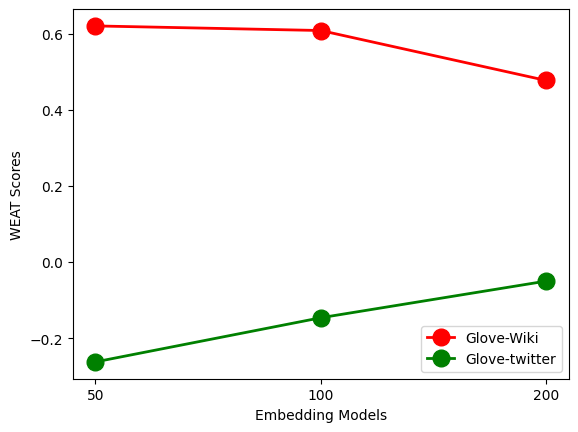

In [138]:
import matplotlib.pyplot as plt
plt.xlabel('Embedding Models')
plt.ylabel('WEAT Scores')
xaxis = ['50','100','200']
plt.plot(xaxis,scores1[:3],color='red', marker='o', linewidth=2, markersize=12, label = 'Glove-Wiki')
plt.plot(xaxis,scores1[3:],color='green', marker='o', linewidth=2, markersize=12, label = 'Glove-twitter')
plt.legend()

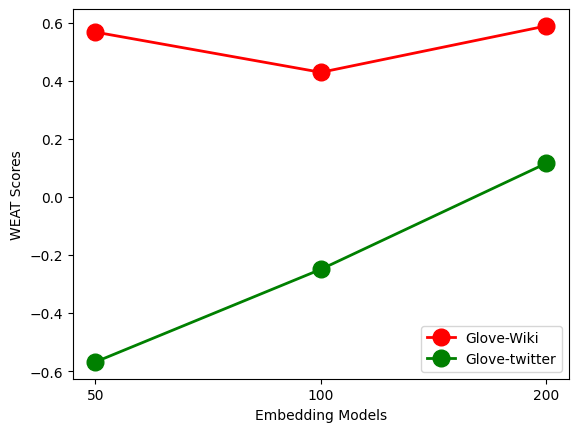

In [144]:
import matplotlib.pyplot as plt
plt.xlabel('Embedding Models')
plt.ylabel('WEAT Scores')
xaxis = ['50','100','200']
plt.plot(xaxis,scores2[:3],color='red', marker='o', linewidth=2, markersize=12, label = 'Glove-Wiki')
plt.plot(xaxis,scores2[3:],color='green', marker='o', linewidth=2, markersize=12, label = 'Glove-twitter')
plt.legend()

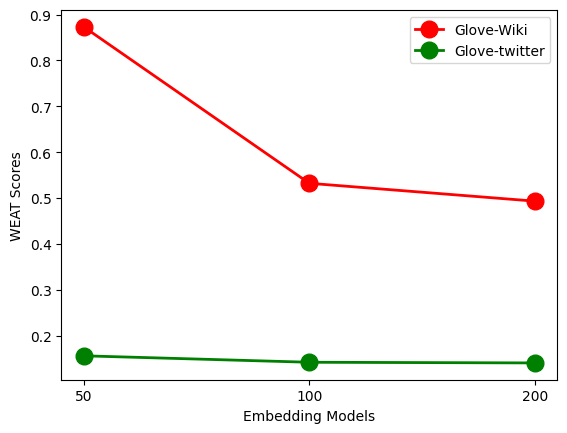

In [145]:
import matplotlib.pyplot as plt
plt.xlabel('Embedding Models')
plt.ylabel('WEAT Scores')
xaxis = ['50','100','200']
plt.plot(xaxis,scores3[:3],color='red', marker='o', linewidth=2, markersize=12, label = 'Glove-Wiki')
plt.plot(xaxis,scores3[3:],color='green', marker='o', linewidth=2, markersize=12, label = 'Glove-twitter')
plt.legend()

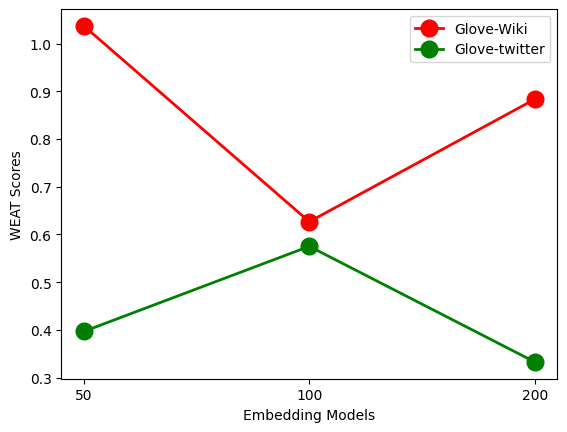

In [146]:
import matplotlib.pyplot as plt
plt.xlabel('Embedding Models')
plt.ylabel('WEAT Scores')
xaxis = ['50','100','200']
plt.plot(xaxis,scores4[:3],color='red', marker='o', linewidth=2, markersize=12, label = 'Glove-Wiki')
plt.plot(xaxis,scores4[3:],color='green', marker='o', linewidth=2, markersize=12, label = 'Glove-twitter')
plt.legend()

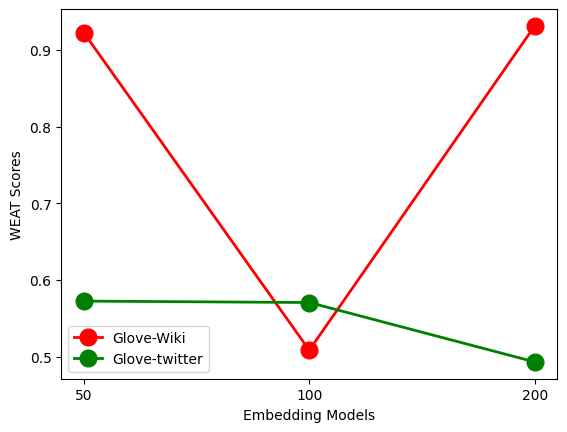

In [147]:
import matplotlib.pyplot as plt
plt.xlabel('Embedding Models')
plt.ylabel('WEAT Scores')
xaxis = ['50','100','200']
plt.plot(xaxis,scores5[:3],color='red', marker='o', linewidth=2, markersize=12, label = 'Glove-Wiki')
plt.plot(xaxis,scores5[3:],color='green', marker='o', linewidth=2, markersize=12, label = 'Glove-twitter')
plt.legend()

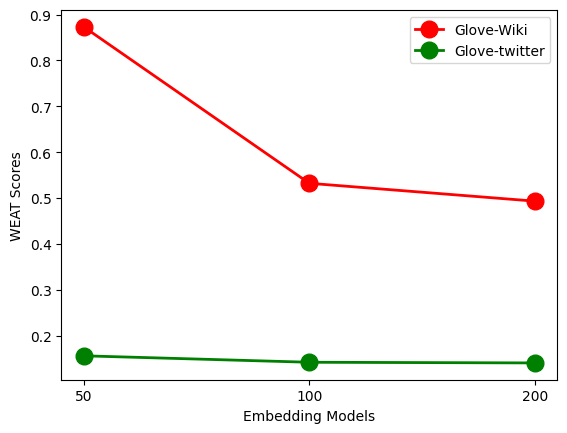

In [148]:
import matplotlib.pyplot as plt
plt.xlabel('Embedding Models')
plt.ylabel('WEAT Scores')
xaxis = ['50','100','200']
plt.plot(xaxis,scores6[:3],color='red', marker='o', linewidth=2, markersize=12, label = 'Glove-Wiki')
plt.plot(xaxis,scores6[3:],color='green', marker='o', linewidth=2, markersize=12, label = 'Glove-twitter')
plt.legend()

In [171]:
s1 = np.array(scores1)
s2 = np.array(scores2)
s3 = np.array(scores3)
s4 = np.array(scores4)
s5 = np.array(scores5)
s6 = np.array(scores6)
c = np.add(s1,s2)
c = np.add(c,s3)
c = np.add(c,s4)
c = np.add(c,s5)
c = np.add(c,s6)
c = c/6
print(c)

[0.81565289 0.53949675 0.64455897 0.07502788 0.17227083 0.19543145]


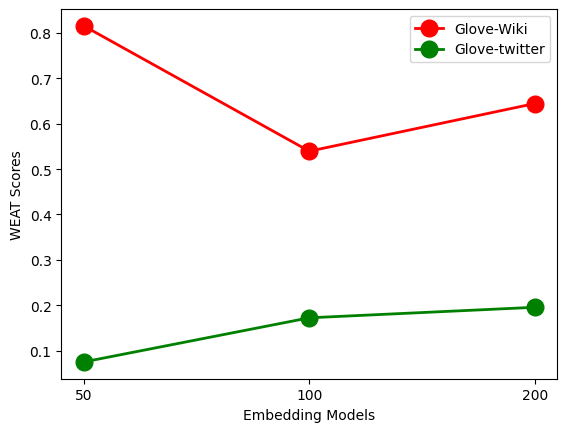

In [172]:
import matplotlib.pyplot as plt
plt.xlabel('Embedding Models')
plt.ylabel('WEAT Scores')
xaxis = ['50','100','200']
plt.plot(xaxis,c[:3],color='red', marker='o', linewidth=2, markersize=12, label = 'Glove-Wiki')
plt.plot(xaxis,c[3:],color='green', marker='o', linewidth=2, markersize=12, label = 'Glove-twitter')
plt.legend()

Babysitters = https://kidsit.com/babysitting-statistics#:~:text=A%20whopping%2097.1%25%20of%20all%20babysitters%20are%20female.
Nurse = https://en.wikipedia.org/wiki/Women_in_nursing#:~:text=In%20the%20United%20States%2C%20women,89%25%20of%20the%20nursing%20workforce.
Cook = https://www.zippia.com/chef-jobs/demographics/
Doctor = https://www.oecd.org/gender/data/women-make-up-most-of-the-health-sector-workers-but-they-are-under-represented-in-high-skilled-jobs.htm#:~:text=On%20average%2C%20the%20share%20of,female%20graduates%20continues%20to%20increase.
Professors = https://www.aauw.org/resources/article/fast-facts-academia/#:~:text=Women%20make%20up%20the%20majority,and%2036%25%20of%20full%20professors.
Prisoner = https://www.prisonstudies.org/sites/default/files/resources/downloads/world_female_imprisonment_list_5th_edition.pdf
Politician = https://en.wikipedia.org/wiki/Women_in_government#:~:text=The%20proportion%20of%20women%20in,national%20assemblies%20is%2024.3%20percent.
Journalist = https://thelogicalindian.com/gender/gender-gap-in-media-number-of-women-journalists-on-decline-in-india-says-study-31416#:~:text=Globally%2C%20women's%20presence%20as%20spokespersons,only%208%25%20of%20the%20stories.

In [186]:
weatscores = []
weatscores.append(s('maid',male,female,wv1))
weatscores.append(s('babysitter',male,female,wv1))
weatscores.append(s('nurse',male,female,wv1))
weatscores.append(s('cook',male,female,wv1))
weatscores.append(s('doctor',male,female,wv1))
weatscores.append(s('journalist',male,female,wv1))
weatscores.append(s('prisoner',male,female,wv1))
weatscores.append(s('professor',male,female,wv1))
weatscores.append(s('politician',male,female,wv1))
print(weatscores)
jobs = [0.762,0.971,0.89,0.269,0.45,0.24,0.069,0.036,0.243]
# weatscores = 1/(1+np.exp(-np.array(weatscores)))


[-1.4757530826692902, -1.2896309703529394, -1.226674177624102, 0.21540990741373334, 0.4820372383015938, 0.6880268678453656, 0.7484942415553224, 1.0501010591974596, 1.4949091948419149]


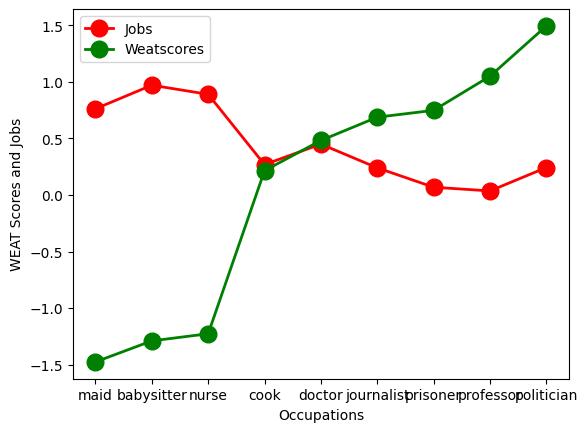

In [11]:
import matplotlib.pyplot as plt
plt.xlabel('Occupations')
plt.ylabel('WEAT Scores and Jobs')
xaxis = ['maid','babysitter','nurse','cook','doctor','journalist','prisoner','professor','politician']
plt.plot(xaxis,[0.762,0.971,0.89,0.269,0.45,0.24,0.069,0.036,0.243],color='red', marker='o', linewidth=2, markersize=12, label = 'Jobs')
plt.plot(xaxis,[-1.4757530826692902, -1.2896309703529394, -1.226674177624102, 0.21540990741373334, 0.4820372383015938, 0.6880268678453656, 0.7484942415553224, 1.0501010591974596, 1.4949091948419149],color='green', marker='o', linewidth=2, markersize=12, label = 'Weatscores')
plt.legend()

In [175]:
a = (s('cook',male,female,wv1))
print(a)

0.21540990741373334


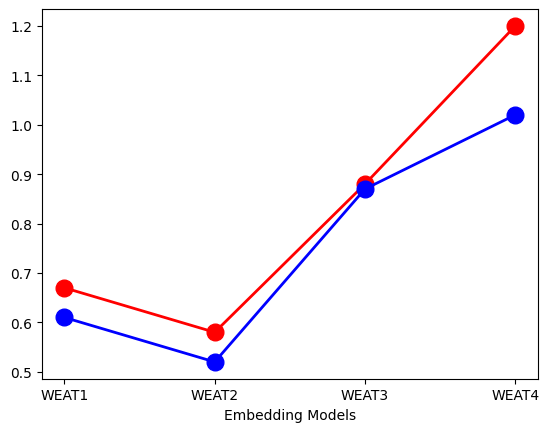

In [10]:
import matplotlib.pyplot as plt
x1 = [0.67,0.58,0.88,1.2]
x2 = [0.61,0.52,0.87,1.02]
plt.xlabel('Embedding Models')
xaxis = ['WEAT1','WEAT2','WEAT3','WEAT4']
plt.plot(xaxis,x1,color='red', marker='o', linewidth=2, markersize=12, label = 'Glove-Wiki')
plt.plot(xaxis,x2,color='blue', marker='o', linewidth=2, markersize=12, label = 'Glove-Wiki')